<a href="https://colab.research.google.com/github/nikinbaidarr/common-projects/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Full Name:
## Email: 
## Team Members [Full names]: 

### Deadline: Feb 4, 12PM. Share to: shreeya.khadka@gmail.com

# 1. Linear Regression with Gradient Descend

In [ ]:
# Import helpers!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats #New library: useful for getting numerous scientific operations

In [ ]:
x = np.arange(0, 100, 1).reshape(-1, 1)
y = 10*x + 10
err = stats.norm.rvs(size=x.shape, scale=50, random_state=13) #Sample random variables from normal distribution with std=50 and mean=0
y = y + err

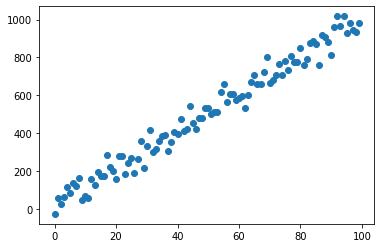

In [ ]:
plt.scatter(x, y)

In [ ]:
print ("shape x:", x.shape)
print ("shape y:", y.shape)

shape x: (100, 1)
shape y: (100, 1)


## Recall gradient descend algorithm
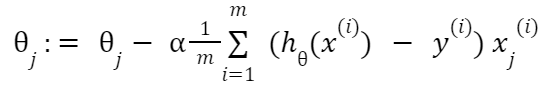

### How would you rewrite this in matrix form?

In [ ]:
def getLinearPrediction(x, theta):
  ''' Return H(x), output shape == x.shape
  '''
  pass

def getLoss(x, y, theta):
  ''' Return SSD loss function. Must be a float value
  '''
  pass

def getLossGradient(x, y, theta):
  ''' Return gradient of loss function. Shape of output must be equal to shape of theta!
  '''
  pass


def linearRegression(x, y, alpha=0.01, num_iterations=100):
  # Initialize theta! 
  theta = np.zeros((2, 1))

  # Save all losses in a list!
  losses = []

  for i in range(num_iterations):
    loss = getLoss(x, y, theta)
    losses.append(loss)

    # Get gradient!
    gradient = getLossGradient(x, y, theta) 
    
    # Upgrade theta!
    theta = theta - alpha * gradient
  return {
      'losses': losses,
      'theta': theta,
  }


alpha = 0.0001
num_iterations = 200

output = linearRegression(x, y, alpha=alpha, num_iterations=num_iterations)

In [ ]:
# Plot prediction!
theta = output.get('theta', np.zeros((2, 1)))
plt.scatter(x, y, label='Original Points')
plt.plot(x, getLinearPrediction(x, theta), label='Fitted Line', color='r')
plt.legend()

In [ ]:
# Plot losses!
losses = output.get('losses', [])
plt.plot(losses, label='Losses', color='r')
plt.legend()

In [ ]:
# A way to check for convergence is to look at how much your losses are reducing per-iteration and stopping the descent if your losses aren't improving anymore.

# Rewrite linearRegression function to stop the descend if absolute delta of loss between 2 consecutive iteration is less than input tolerance. 
# i.e. Break from loop if |loss(i+1) - loss(i)| <= tolerance, where i is iteration index


def linearRegression2(x, y, alpha=0.01, num_iterations=100, tolerance=0.005):
  # Refer to linearRegression function. Only requires slight adjustments to original code.
  pass

  
alpha = 0.0001
num_iterations = 200
tolerance = 0.005

output = linearRegression2(x, y, alpha=alpha, num_iterations=num_iterations, tolerance=tolerance)

In [ ]:
# Plot losses!
losses = output.get('losses', [])
plt.plot(losses, label='Losses', color='r')
plt.legend()

### Q) What happends to the gradient descend when the learning rate is increased to 0.001? What about when its lowered to 0.00001? 

#2.  Direct Solution: Obtain closed form solution [Recall: Normal equation]


In [ ]:
def getActualTheta(x, y):
  ''' Return actual theta of shape (2, 1)
  '''
  pass

thetaReal = getActualTheta(x, y)

In [ ]:
# Plot real solution
plt.scatter(x, y, label='Original Points')
plt.plot(x, getLinearPrediction(x, thetaReal), label='Fitted Line', color='r')
plt.legend()

In [ ]:
# How close are we to the closed form solution?

lossReal = getLoss(x, y, thetaReal)
output = linearRegression(x, y, alpha=0.000005, num_iterations=200)
losses = output.get('losses')
plt.plot(losses, label='Gradient Descend Losses', color='r')
plt.axhline(lossReal, label='Normal equation Loss', color='b', ls='-.')
plt.legend()